# Classificação de Textos

Vamos explorar nessa seção a utilização de métodos de representação explícita (engenharia de características) e codificação de problemas como classificação textual.

### Materiais

[Biblioteca SciKit Learn - Classificador Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)



## Análise de Sentimentos

Vamos modelar a tarefa de análise de sentimentos como uma tarefa de classificação textual. Logo, nosso sistema deverá receber um texto e devolver uma classe descrevendo a polaridade da avaliação expressa nesse texto (positiva ou negativa)

In [2]:
!wget http://marlovss.work.gd:8080/tomorrow/aula3/as.zip
!unzip as.zip -d corpus

UsageError: Line magic function `%unzip` not found.


In [4]:
import nltk
from nltk.corpus import PortugueseCategorizedPlaintextCorpusReader

root_dir='./corpus'
corpus = PortugueseCategorizedPlaintextCorpusReader(cat_pattern="([^_]*)_.*",fileids=".*\.txt",root=root_dir)

In [10]:
# corpus.categories()
# corpus.words()
# corpus.sents()
# corpus.fileids()
# list(corpus.sents(fileids=[corpus.fileids()[0]]))

print(corpus.raw(fileids=[corpus.fileids()[0]]))
print(set(corpus.words(fileids=[corpus.fileids()[0]])))
print(corpus.categories(fileids=[corpus.fileids()[0]]))


Quando comentei o lançamento de Presságio, em abril do ano passado, havia posto na roda através de uma pequena digressão a escassez de novas ideias para lidar com o fim do mundo no cinema.
O filme-catástrofe de Alex Proyas, por mais inconseqüente e desastroso que seja, acabou se tornando uma referência na busca por soluções para esta fórmula soterrada por definitivo por as megalomanias de Rolland Emmerich 2012 e a Pandora de Avatar, de James Cameron -- afinal, se a sentença do fim do mundo está dada e os humanos já encontram alternativas para povoar outros planetas, qual a possibilidade de um simples tornado Twister ou vulcão O Inferno de Dante impressionar o público
É preciso inovar e extrapolar, buscar novas formas de despertar esta curiosidade mórbida por o medo.
Pandorum, de Christopher Alvart, leva este gosto por a miscelnea alternativa de um Presságio para o espaço, numa espécie de ponto de ligação entre aquele filme e as suposições sobre povoamento de planetas alternativos e de 

## Construindo uma representação para o texto

Construa uma representação semântica para o conteúdo do texto, aplicável à tarefa de análise de sentimentos

In [15]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [60]:

# Vocabulario do corpus sem stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese'))
vocab = set([word.lower() for word in corpus.words() if word.isalpha() and word.lower() not in stopwords])

# Filtrar o vocabulário para apenas adjetivos
nltk.download('floresta')
from nltk.corpus import floresta
floresta_tagged = floresta.tagged_words()
adjectives = set([word.lower() for (word,tag) in floresta_tagged if tag.find('adj') != -1 and word.lower() in vocab]) 

vocab = vocab.intersection(adjectives)
print(vocab)


[nltk_data] Downloading package floresta to
[nltk_data]     C:\Users\oknotok\AppData\Roaming\nltk_data...
[nltk_data]   Package floresta is already up-to-date!


{'seguro', 'imigrante', 'abstratos', 'brasileiros', 'sensível', 'autorais', 'brasileiras', 'vi', 'jornalista', 'produtivo', 'monstruoso', 'turistas', 'modesta', 'noturno', 'político', 'inseparáveis', 'viável', 'nobre', 'imensa', 'digna', 'amadoras', 'trabalhista', 'urbano', 'universal', 'péssima', 'discreto', 'secretos', 'amorosas', 'indomáveis', 'efetiva', 'antigo', 'sonhadora', 'ricos', 'central', 'simples', 'oportunistas', 'bela', 'únicos', 'inútil', 'preta', 'válido', 'subsequente', 'temático', 'iguais', 'jurídica', 'violento', 'econômicos', 'altíssimo', 'profundo', 'então', 'bacanas', 'privado', 'pescadores', 'universitário', 'gratuita', 'estável', 'segundos', 'civis', 'perigosa', 'intelectual', 'bíblica', 'ficcionais', 'mínimos', 'surda', 'policiais', 'ideal', 'talentoso', 'inglês', 'clássicos', 'imensas', 'trágica', 'soviético', 'repletas', 'atenta', 'belíssimos', 'republicano', 'chamados', 'amistoso', 'espiritual', 'verdadeira', 'pequena', 'louvável', 'imenso', 'bonita', 'ameaç

In [64]:

# Cada texto do corpus será representado por um vetor de features mapeando a frequência de cada palavra do vocabulário
def repr(text):
  rep = [0]*len(vocab)
  for word in text.split():
    word = word.lower()
    if word in vocab:
      rep[list(vocab).index(word)] += 1
  return rep

print(repr('seguro imigrante abstratos'))

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [65]:
X = [repr(corpus.raw(fileids=[file])) for file in corpus.fileids()]
Y = [corpus.categories(fileids=[file])[0] for file in corpus.fileids()]

In [66]:
data = list(zip(X,Y))

print(X[0])
print(Y[0])

print(data[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [67]:
import random

random.shuffle(data)
X,Y = zip(*data)

In [68]:
import math

trainX = X[:math.floor(len(X)*0.7)]
trainY = Y[:math.floor(len(Y)*0.7)]

testX = X[math.floor(len(X)*0.7):]
testY = Y[math.floor(len(Y)*0.7):]

In [69]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(trainX,trainY)


SVC()

In [70]:
svc.score(testX,testY)

0.6363636363636364

In [ ]:
predicted = svc.predict(testX)

for i in range(len(predicted)):
  print(f'Predicted: {predicted[i]} - Real: {testY[i]}')

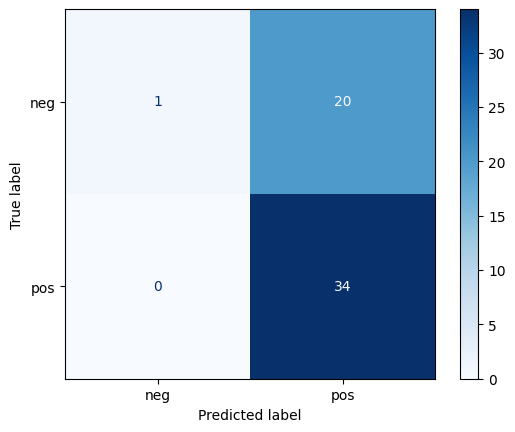

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    svc,
    testX,
    testY,
    cmap=plt.cm.Blues,
)

### Utilizando uma representação esparsa (Bag of Words)

[SK-Learn Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)



[SK-Learn TFIDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [75]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import math
import nltk
import random
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words.extend(['(',')','%',',','\"',"\'",":","$","-","--",'.',';','?'])
counter = CountVectorizer(stop_words=stop_words)
data = [(corpus.raw(fileids=[fileid]),corpus.categories(fileids=[fileid])[0]) for fileid in corpus.fileids()]
random.shuffle(data)
texts,cats = zip(*data)
texts = list(texts)
cats = list(cats)
counter = counter.fit(texts)
X = counter.transform(texts[:math.floor(len(texts)*0.7)])
y = cats[:math.floor(len(cats)*0.7)]
testX = counter.transform(texts[math.floor(len(texts)*0.7):])
testY = cats[math.floor(len(cats)*0.7):]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oknotok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
from sklearn.svm import SVC
svc = SVC()
svc = svc.fit(X,y)

In [77]:
svc.score(testX,testY)

0.6727272727272727

Como poderíamos fazer para o caso de um etiquetador morfossintático?

In [ ]:
!pip install conllu
!wget http://marlovss.work.gd:8080/tomorrow/aula2/bosque.conllu
!wget http://marlovss.work.gd:8080/tomorrow/aula2/test.conllu


In [ ]:
import conllu
import itertools as it

class AttributeDict(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


class CoNLLU:
   def __init__(self, files):
      self.words = []
      self.sentences = []
      for f in files:
         parsed = conllu.parse(open(f).read())
         sents = [[AttributeDict(form = token['form'], lemma=token['lemma'],pos=token['upos'],feats=token['feats']) for token in tokenlist if token['upos']!='_'] for tokenlist in parsed]
         self.sentences.extend(sents)
         self.words.extend([word for sent in sents for word in sent])
      self.pos_tags = set([word.pos for word in self.words])
      self.feats_dict ={pos:set(it.chain.from_iterable([list(word.feats.keys()) for word in self.words if word.pos==pos and word.feats!= None])) for pos in self.pos_tags}


In [ ]:
bosque = CoNLLU(files=["bosque.conllu"])
test = CoNLLU(files=["test.conllu"])


# Word Embeddings e Representações vetoriais
Vamos explorar um pouco modelos de embeddings e sua utilização para construir representações de textos para aprendizagem de máquina

### Materiais

[Biblioteca Gensim](https://radimrehurek.com/gensim/)

[Word Embedding NILC](http://www.nilc.icmc.usp.br/embeddings)

In [ ]:
!wget http://143.107.183.175:22980/download.php?file=embeddings/word2vec/skip_s50.zip -O skip_s50.zip
!unzip skip_s50.zip

--2024-07-26 00:43:14--  http://143.107.183.175:22980/download.php?file=embeddings/word2vec/skip_s50.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176485664 (168M) [application/octet-stream]
Saving to: ‘skip_s50.zip’

skip_s50.zip        100%[===================>] 168.31M  8.27MB/s    in 20s     

2024-07-26 00:43:34 (8.63 MB/s) - ‘skip_s50.zip’ saved [176485664/176485664]



In [ ]:
!unzip skip_s50.zip

Archive:  skip_s50.zip
  inflating: skip_s50.txt            


In [ ]:
import gensim
from gensim.test.utils import datapath
from  gensim.models.keyedvectors import Word2VecKeyedVectors
model = Word2VecKeyedVectors.load_word2vec_format('skip_s50.txt')

In [ ]:
print(model['pessoa'])
print(model['pessoa'].shape)

[-0.295763 -0.109035 -0.51675  -0.001818 -0.058122 -0.050199 -0.345249
 -0.183904 -0.028004 -0.358447  0.172903 -0.094734 -0.108177  0.148727
 -0.102512 -0.061394 -0.272937  0.071819 -0.403729  0.168113 -0.19235
  0.299979  0.090583 -0.266522  0.189941  0.006384  0.426003 -0.200579
  0.092999 -0.004578  0.468458 -0.101667  0.007105 -0.154752 -0.474237
  0.161002  0.101593  0.089223 -0.100523  0.372997 -0.138943 -0.405767
 -0.341875  0.630216 -0.066666 -0.276118  0.254343 -0.032535 -0.17794
  0.074828]
(50,)


In [ ]:
print(model.index_to_key[:100])

['</s>', ',', 'de', '.', 'a', 'o', 'e', 'que', 'do', 'da', 'em', 'para', 'um', 'no', 'com', 'é', 'uma', 'os', 'não', 'na', '00', '0000', 'por', ')', '(', 'as', 'se', 'dos', 'foi', 'como', 'ao', 'mais', '?', '0', 'das', '-', 'mas', 'sua', 'ou', 'ser', 'seu', '000', ':', 'são', '«', 'pelo', '»', 'eu', 'ele', 'está', 'pela', 'também', 'nos', 'sobre', 'você', 'entre', 'tem', ';', '!', 'já', 'isso', 'anos', 'ainda', 'muito', 'aos', 'até', '/', 'quando', 'era', 'ter', 'bem', 'foram', 'mesmo', 'pode', 'nas', 'este', 'segundo', 'comissão', 'ano', 'dois', 'seus', 'ela', 'onde', 'depois', 'há', 'esta', 'dia', '%', 'todos', 'só', 'me', 'vai', 'sem', 'grande', 'parte', 'presidente', 'fazer', 'outros', 'durante', 'estado']


In [ ]:
print(model.most_similar('mulher'))

## Construindo representações para textos

Vamos construir uma representação ingênua de textos a partir das representações das palavras e utiliza-la para a tarefa de identificação de similaridade semântica

In [ ]:
!wget http://marlovss.work.gd:8080/tomorrow/aula3/assin.zip
!unzip assin.zip -d assin

--2024-07-26 00:59:31--  http://marlovss.work.gd:8080/tomorrow/aula3/assin.zip
Resolving marlovss.work.gd (marlovss.work.gd)... 177.180.149.154
Connecting to marlovss.work.gd (marlovss.work.gd)|177.180.149.154|:8080... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290655 (284K) [application/zip]
Saving to: ‘assin.zip’

assin.zip           100%[===================>] 283.84K   218KB/s    in 1.3s    

2024-07-26 00:59:33 (218 KB/s) - ‘assin.zip’ saved [290655/290655]

Archive:  assin.zip
  inflating: assin/assin2-test.xml   
  inflating: assin/assin2-train.xml  


In [ ]:
'unk' in model

True

In [ ]:
import numpy as np
def w2v_avg(lista_de_palavras,model):
   if len(lista_de_palavras)>0:
     lista_de_vetores = [model[palavra] if palavra in model else model['unk'] for palavra in lista_de_palavras ]
     return np.sum(lista_de_vetores,axis=0)/len(lista_de_vetores)
   else:
     return lista_de_vetores

rep = w2v_avg("o rato roeu a roupa do rei de roma".split(),model)
print(rep)
print(rep.shape)

[-0.10021989  0.105626   -0.08843433 -0.03277322  0.01006678 -0.21886735
 -0.20620257 -0.20914677 -0.08895311 -0.03475666  0.0876061  -0.16550265
  0.12535112  0.00960356 -0.09276699 -0.12015767  0.07364266  0.03477145
  0.02299567 -0.00696233  0.03394522  0.06740034  0.06485156 -0.42602924
 -0.08269379 -0.18157789  0.09410334 -0.15196978 -0.14423145  0.12327857
  0.13763922  0.01964189  0.09452455  0.16938433  0.11580789 -0.19084166
 -0.06192011  0.06950122 -0.19876844  0.07833301  0.03262489 -0.12186745
  0.11308779  0.10795633 -0.2771672   0.13939865 -0.1406939   0.04911755
  0.06284567  0.019849  ]
(50,)


In [ ]:
import re
import random
xmlText = open("assin/assin2-train.xml").read()
pairsText = re.findall("(?s)<pair entailment=\"([^\"]+)\".+?similarity=\"([^\"]+)\">(.+?)</pair>",xmlText)
pairs = [(re.findall("<t>(.+?)</t>",t[2])[0].lower(),re.findall("<h>(.+?)</h>",t[2])[0].lower(),t[1],1) for t in pairsText if t[0]=="Paraphrase"]
pairs.extend([(re.findall("<t>(.+?)</t>",t[2])[0].lower(),re.findall("<h>(.+?)</h>",t[2])[0].lower(),t[1],0) for t in pairsText if t[0]!="Paraphrase"])
random.shuffle(pairs)
X = [w2v_avg(s1,model)-w2v_avg(s2,model) for (s1,s2,sim,c) in pairs]
y = [float(sim) for (s1,s2,sim,c) in pairs]

In [ ]:
import sklearn
from sklearn.svm import SVR

svr = SVR()
svr = svr.fit(X,y)


In [ ]:
xmlText = open("assin/assin2-test.xml").read()
pairsText = re.findall("(?s)<pair entailment=\"([^\"]+)\".+?similarity=\"([^\"]+)\">(.+?)</pair>",xmlText)
testPairs = [(re.findall("<t>(.+?)</t>",t[2])[0].lower(),re.findall("<h>(.+?)</h>",t[2])[0].lower(),t[1],1) for t in pairsText if t[0]=="Paraphrase"]
testPairs.extend([(re.findall("<t>(.+?)</t>",t[2])[0].lower(),re.findall("<h>(.+?)</h>",t[2])[0].lower(),t[1],0) for t in pairsText if t[0]!="Paraphrase"])
testX = [w2v_avg(s1,model)-w2v_avg(s2,model) for (s1,s2,sim,c) in testPairs]
testy = [float(sim) for (s1,s2,sim,c) in testPairs]

In [ ]:
svr.score(testX,testy)

0.08853227066327074